In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import seaborn
import numpy as np
import os

%pylab inline
    
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "{}/data/PUIdata".format(os.getenv("HOME"))
    puidata = os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Hypothesis to test

Idea: Tourists do longer trips than New Yorkers in CitiBikes. Because tourists are visiting and exploring the city, while New Yorkers use them mostly for commuting, their trips should be longer.

Null and Alternative Hypothesis in words,

$H_0$: Tourists trips on CitiBike are on average shorter or equal than New Yorkers trips, with a significance level of 0.05

$H_a$: Tourists trips on CitiBike are on average longer than New Yorkers trips

Null and Alternative Hypothesis in formula,

$H_0$: $T_{tourists} <= T_{newyorkers}$

$H_a$: $T_{tourists} > T_{newyorkers}$

### Download the data or skip if its already downloaded

In [2]:
datestring = '201612'

#Check file
if not os.path.isfile(puidata + "/" + datestring + "-citibike-tripdata.csv"):
    #Check zip
    if not os.path.isfile(puidata + "/" + datestring + "-citibike-tripdata.zip"):
        #Download zip and move to puidata
        print ("Downloading file") 
        os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
        os.system("mv " + datestring + "-citibike-tripdata.zip " + puidata)
    # Unzip and move to puidata
    print ("Unzipping file") 
    os.system("unzip " + puidata + "/" + datestring + "-citibike-tripdata.zip")
    os.system("mv " + datestring + "-citibike-tripdata.csv " + puidata)
    
# Check:
if not os.path.isfile(puidata + "/" + datestring + "-citibike-tripdata.csv"):
    print ("WARNING!!! Something is wrong: the file is not there!")

else:
    print ("File in place, you can continue")

Unzipping file
File in place, you can continue


### Read data to Pandas

In [3]:
citibike_df = pd.read_csv(puidata + "/" + datestring + '-citibike-tripdata.csv')
citibike_df.head(10)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,528,2016-12-01 00:00:04,2016-12-01 00:08:52,499,Broadway & W 60 St,40.769155,-73.981918,228,E 48 St & 3 Ave,40.754601,-73.971879,26931,Subscriber,1964.0,1
1,218,2016-12-01 00:00:28,2016-12-01 00:04:06,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,27122,Subscriber,1955.0,1
2,399,2016-12-01 00:00:39,2016-12-01 00:07:19,297,E 15 St & 3 Ave,40.734232,-73.986923,345,W 13 St & 6 Ave,40.736494,-73.997044,19352,Subscriber,1985.0,1
3,254,2016-12-01 00:00:44,2016-12-01 00:04:59,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,20015,Subscriber,1982.0,1
4,1805,2016-12-01 00:00:54,2016-12-01 00:31:00,279,Peck Slip & Front St,40.707873,-74.001670,279,Peck Slip & Front St,40.707873,-74.001670,23148,Subscriber,1989.0,1
5,483,2016-12-01 00:01:13,2016-12-01 00:09:17,245,Myrtle Ave & St Edwards St,40.693270,-73.977039,372,Franklin Ave & Myrtle Ave,40.694528,-73.958089,16140,Subscriber,1986.0,1
6,1114,2016-12-01 00:01:37,2016-12-01 00:20:12,470,W 20 St & 8 Ave,40.743453,-74.000040,453,W 22 St & 8 Ave,40.744751,-73.999154,19997,Subscriber,1964.0,1
7,2680,2016-12-01 00:01:50,2016-12-01 00:46:30,3312,1 Ave & E 94 St,40.781721,-73.945940,3325,E 95 St & 3 Ave,40.784903,-73.950503,26105,Subscriber,NaN,0
8,1967,2016-12-01 00:01:52,2016-12-01 00:34:40,387,Centre St & Chambers St,40.712733,-74.004607,387,Centre St & Chambers St,40.712733,-74.004607,21348,Customer,NaN,0
9,356,2016-12-01 00:01:54,2016-12-01 00:07:50,496,E 16 St & 5 Ave,40.737262,-73.992390,212,W 16 St & The High Line,40.743349,-74.006818,22517,Subscriber,1954.0,1


### Clean the data and keep only what is needed

In [4]:
#Only User Type and Trip Duration are needed
citibike_df = citibike_df.loc[:,['User Type','Trip Duration']]

In [5]:
#Check if we have nulls 
citibike_df.isnull().sum()

User Type        5388
Trip Duration       0
dtype: int64

In [6]:
#Lets look at user types
citibike_df['User Type'].value_counts()

Subscriber    774278
Customer       32526
Name: User Type, dtype: int64

In [7]:
#Remove null user types
citibike_df = citibike_df.loc[citibike_df['User Type'].isnull() == False]

In [8]:
#We assume Subscribers are New Yorkers and Customers are Tourists.
#Subscribers have a 1-year membership so they are definitely New Yorkers,
#and Customers have 24-hour o 3-day passes, so most of them should be Tourists (though some New Yorkers are there also there)
citibike_df['User Type'] = citibike_df['User Type'].map({'Subscriber':'New Yorker', 'Customer':'Tourist'})

In [9]:
#show first rows
citibike_df.head(10)

,User Type,Trip Duration
0,New Yorker,528
1,New Yorker,218
2,New Yorker,399
3,New Yorker,254
4,New Yorker,1805
5,New Yorker,483
6,New Yorker,1114
7,New Yorker,2680
8,Tourist,1967
9,New Yorker,356


In [10]:
#Lets look at user types
citibike_df['User Type'].value_counts()

New Yorker    774278
Tourist        32526
Name: User Type, dtype: int64

In [11]:
#Lets look at trip durations
citibike_df['Trip Duration'].mean()

771.55496626194213

### Plot the data

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


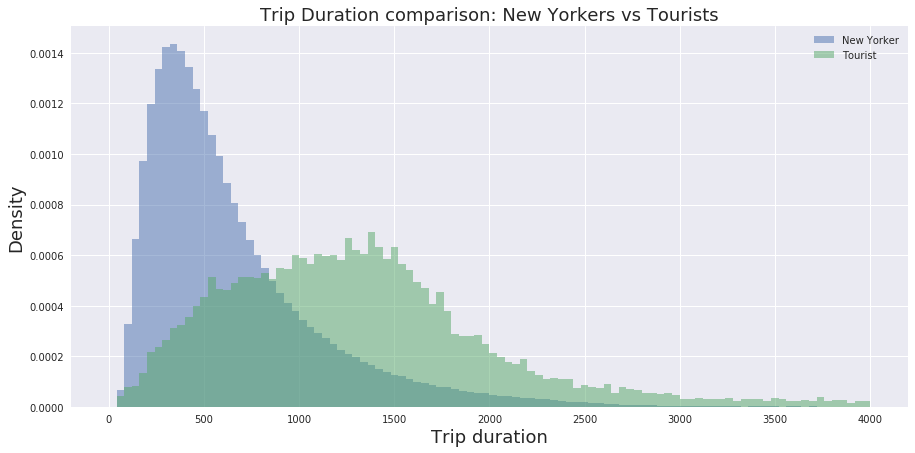

In [12]:
ax = plt.figure(figsize=(15,7)).add_subplot(111)

ax.set_ylabel('Density', fontsize=18)
ax.set_xlabel('Trip duration', fontsize=18)
ax.set_title('Trip Duration comparison: New Yorkers vs Tourists', fontsize=18)

ax.hist(citibike_df.loc[citibike_df['User Type'] == 'New Yorker']['Trip Duration'], range=(0, 4000), bins=100, density=True, alpha=0.5, label='New Yorker')
ax.hist(citibike_df.loc[citibike_df['User Type'] == 'Tourist']['Trip Duration'], range=(0, 4000), bins=100, density=True, alpha=0.5, label='Tourist')

ax.legend()

plt.show()